# Diwali Sales Data Analysis

**Author:** Ayush Vishwakarma  
**Tools Used:** Python, Pandas, Seaborn, Matplotlib  
**Date:** August 2025  

This project analyzes consumer behavior during the Diwali festive season using sales data.  
It covers insights into customer demographics, product categories, and purchasing trends across various Indian states.

In [1]:
# IMPORTING LIBRARIES
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns

In [2]:
#READING DATA
sales_data = pd.read_csv('ayush_diwali_sales.csv',encoding='unicode_escape')

In [3]:
#PRELIMINARY CHECK OF DATA SHAPE
sales_data.shape

(11251, 15)

In [4]:
#READING A SAMPLE PORTION OF DATA
sales_data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,AndhraÂ Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Data Cleaning

The first step in Data Cleaning in this project is to find out if any column contains NULL Values, using df.info() function.

In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


As we can observe that Status and unnamed1 columns have zero NOT NULL values. This implies that all of their values are NULL. Hence, we will drop them. We can observe that Amount column has comparitively less NOT NULL values.

In [6]:
sales_data.drop(['Status','unnamed1'],axis = 1, inplace = True)

Next, let us check out how many NULL values do we have left in each column.

In [7]:
pd.isnull(sales_data).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

Let's drop the rows containing NULL values.

In [8]:
sales_data.dropna(inplace=True)

To check whether this worked, we will see the shape of the dataframe.

In [9]:
sales_data.shape

(11239, 13)

## Exploratory Data Analysis (EDA)

In [10]:
sales_data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


#### 📊 Gender Distribution
This bar chart shows the count of purchases made by each gender.
From the graph, we observe that:
- **Females** have made slightly more purchases than **males**.
- This indicates higher shopping activity among females during the Diwali period.

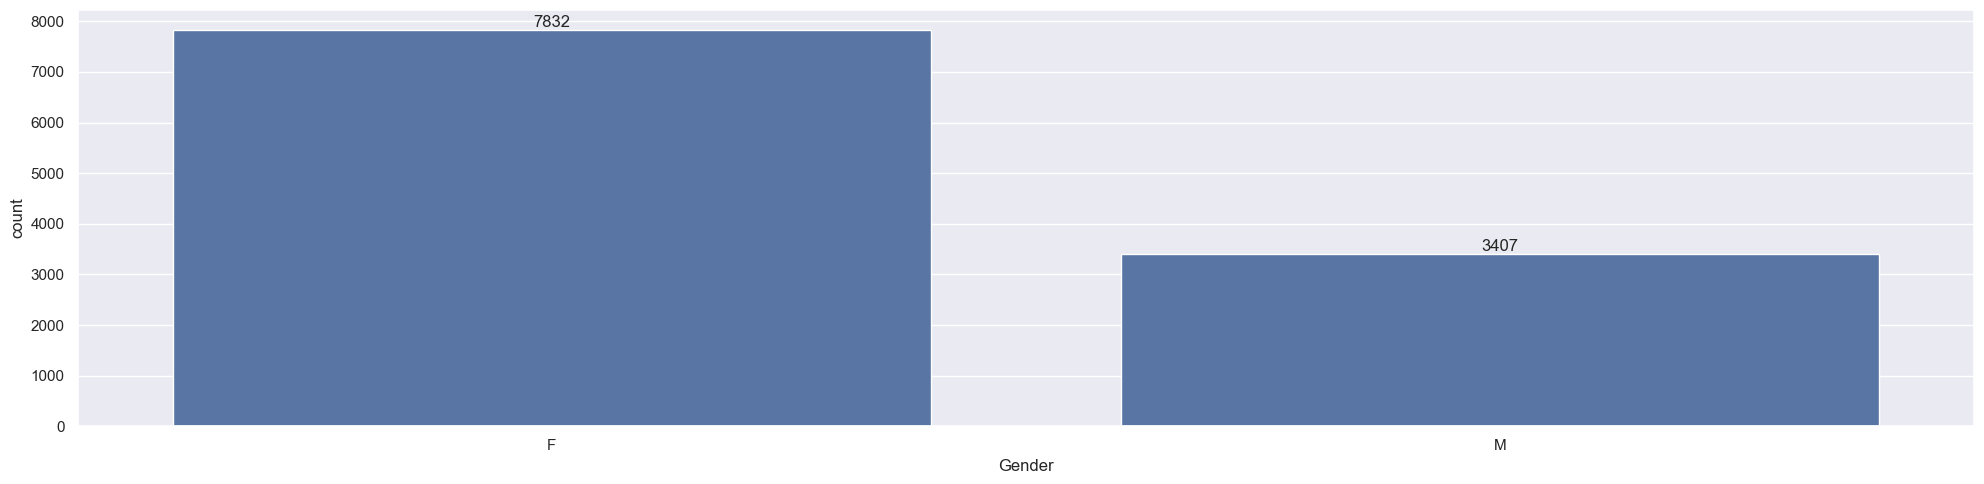

In [29]:
# plotting a bar chart for Gender and its count
ax = sns.countplot(x = 'Gender',data = sales_data)
plt.tight_layout() 
for bars in ax.containers:
    ax.bar_label(bars)

#### 💰 Total Sales by Gender
This bar chart represents the **total purchase amount** segmented by gender.  
Observations:
- **Females** contributed more to the overall sales than males.
- This further confirms that women are the key consumers during festive shopping.


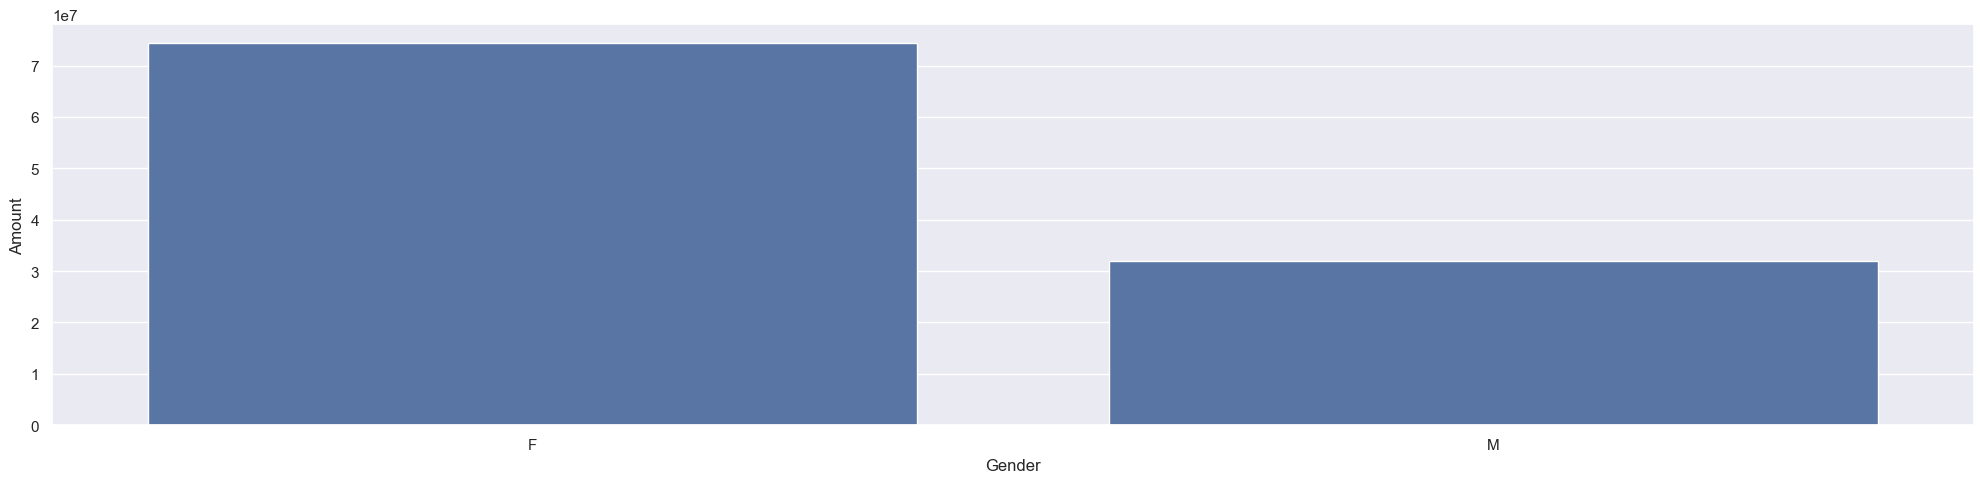

In [41]:
# plotting a bar chart for gender vs total amount

sales_gen = sales_data.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)
plt.tight_layout() 

#### 🎂 Age Group Distribution by Gender
This chart shows the count of buyers by **age group**, split by gender.
- The **26–35** age group dominates, especially among **females**.
- This suggests that young adults are the most active buyers during Diwali sales.


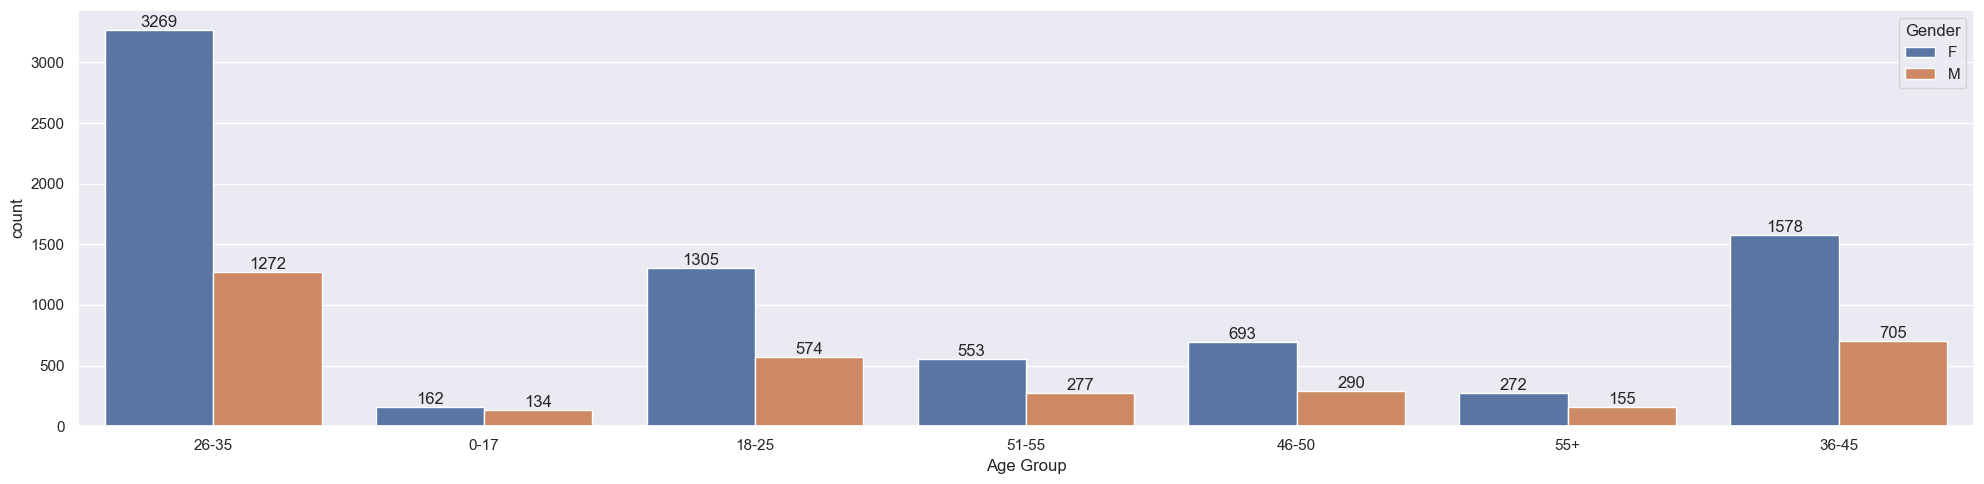

In [42]:
#Age
ax = sns.countplot(data = sales_data, x = 'Age Group', hue = 'Gender')
plt.tight_layout() 
for bars in ax.containers:
    ax.bar_label(bars)

#### 🧾 Total Sales by Age Group
This bar chart depicts the **total amount spent** by different age groups.
- The **26–35** age group spent the most.
- This aligns with the earlier count chart and reinforces the trend.


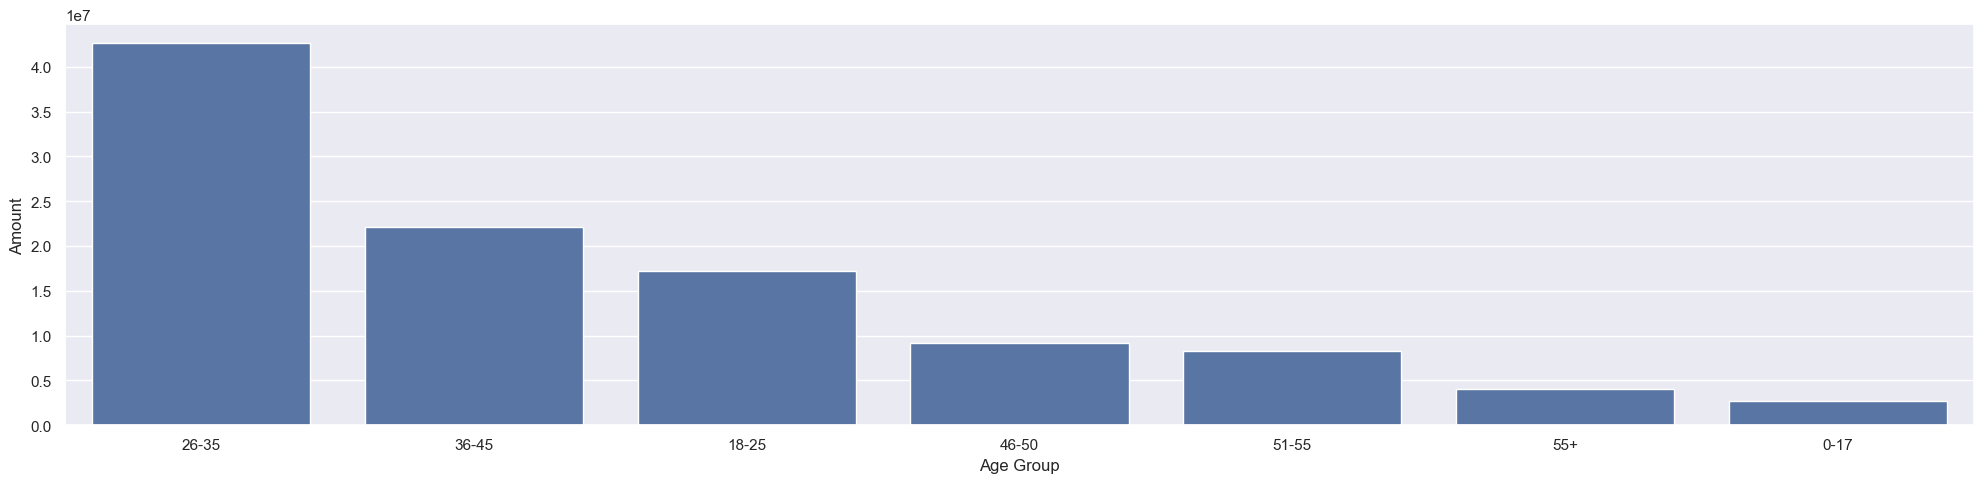

In [44]:
# Total Amount vs Age Group
sales_age = sales_data.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)
plt.tight_layout()

#### 🗺️ Top 10 States by Orders
This chart displays the **states with the highest number of orders**.
- States like **Uttar Pradesh**, **Maharashtra**, and **Karnataka** are the top contributors.
- This indicates higher customer engagement from these regions.


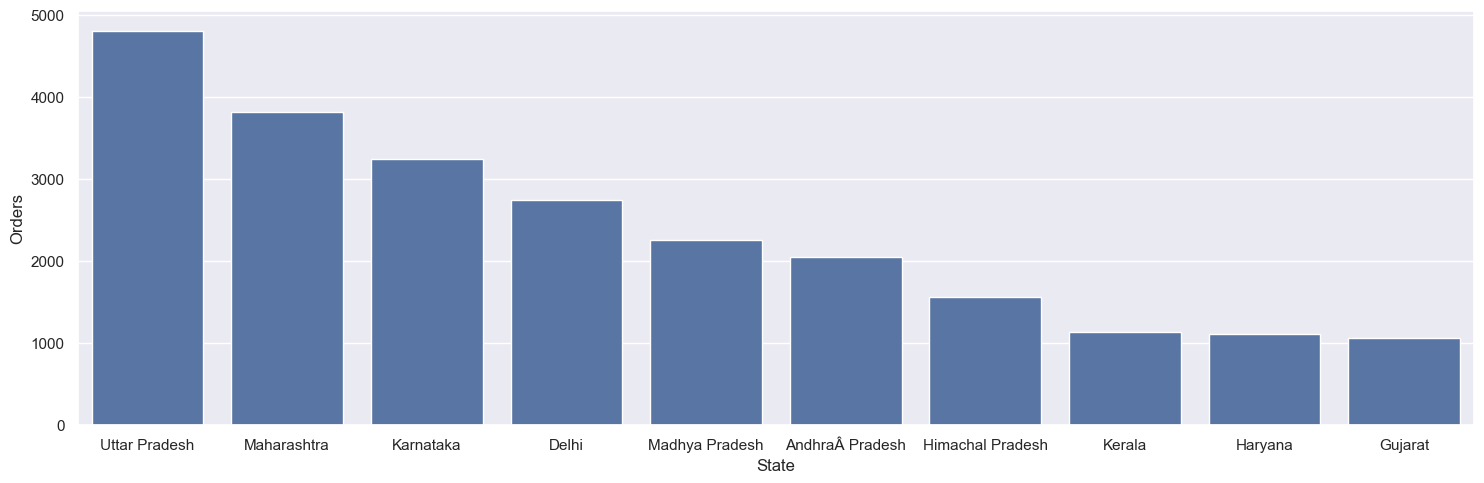

In [45]:
# total number of orders from top 10 states

sales_state = sales_data.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')
plt.tight_layout() 

#### 💸 Top 10 States by Total Sales
This bar chart shows the **total amount of sales** from the top 10 states.
- **Uttar Pradesh** and **Maharashtra** again lead the chart, not just by volume but by value too.
- These regions likely have higher purchasing power or brand influence.


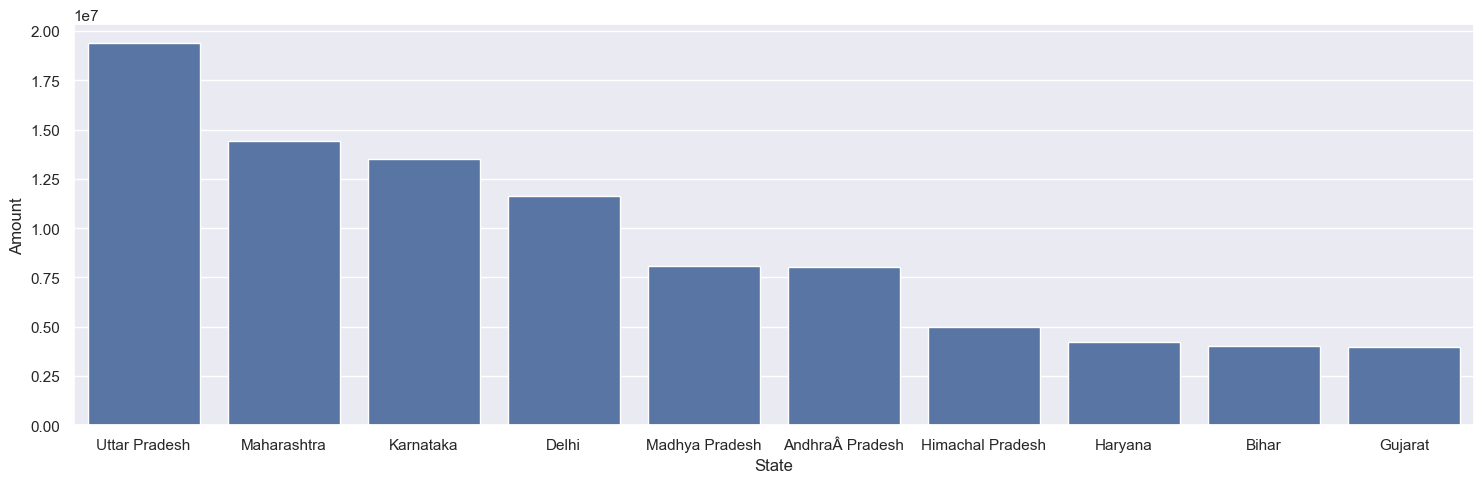

In [33]:
# total amount/sales from top 10 states

sales_state = sales_data.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')
plt.tight_layout() 

#### 💍 Marital Status Distribution
This bar chart shows the **count of orders by marital status**.
- Both **Married** and **Unmarried** customers have contributed nearly equally to purchases.
- However, **Married** customers slightly lead in total number of orders.


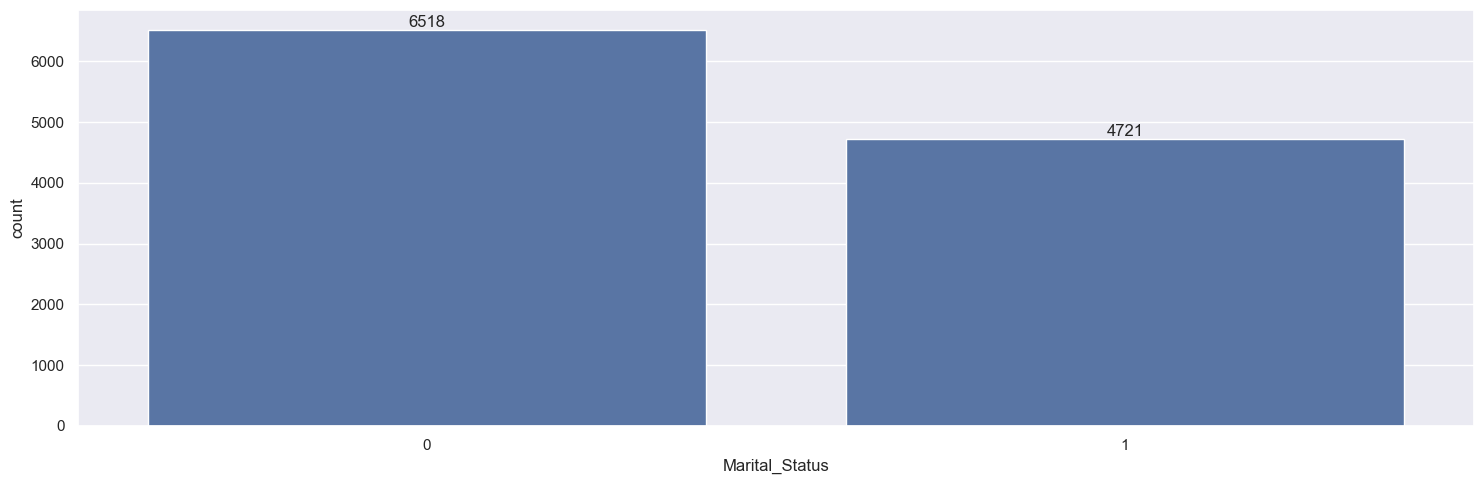

In [47]:
#MARITAL STATUS
ax = sns.countplot(data = sales_data, x = 'Marital_Status')
plt.tight_layout() 
sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

#### 🛍️ Total Sales by Marital Status
This graph represents the **total purchase amount** by marital status.
- **Married individuals** have spent more than unmarried ones.
- This could be due to family-based Diwali shopping, where married individuals shop for more people.


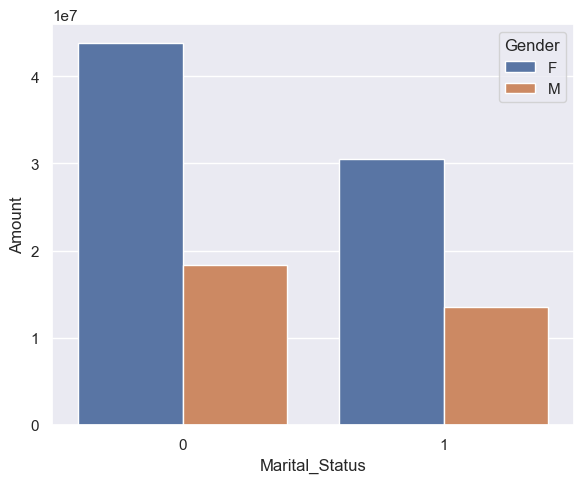

In [49]:
sales_state = sales_data.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')
plt.tight_layout() 

#### 👔 Customer Count by Occupation
This chart shows the **number of buyers in each occupation category**.
- **IT sector** employees dominate the buyer segment.
- This may reflect higher disposable income and digital awareness in the IT group.


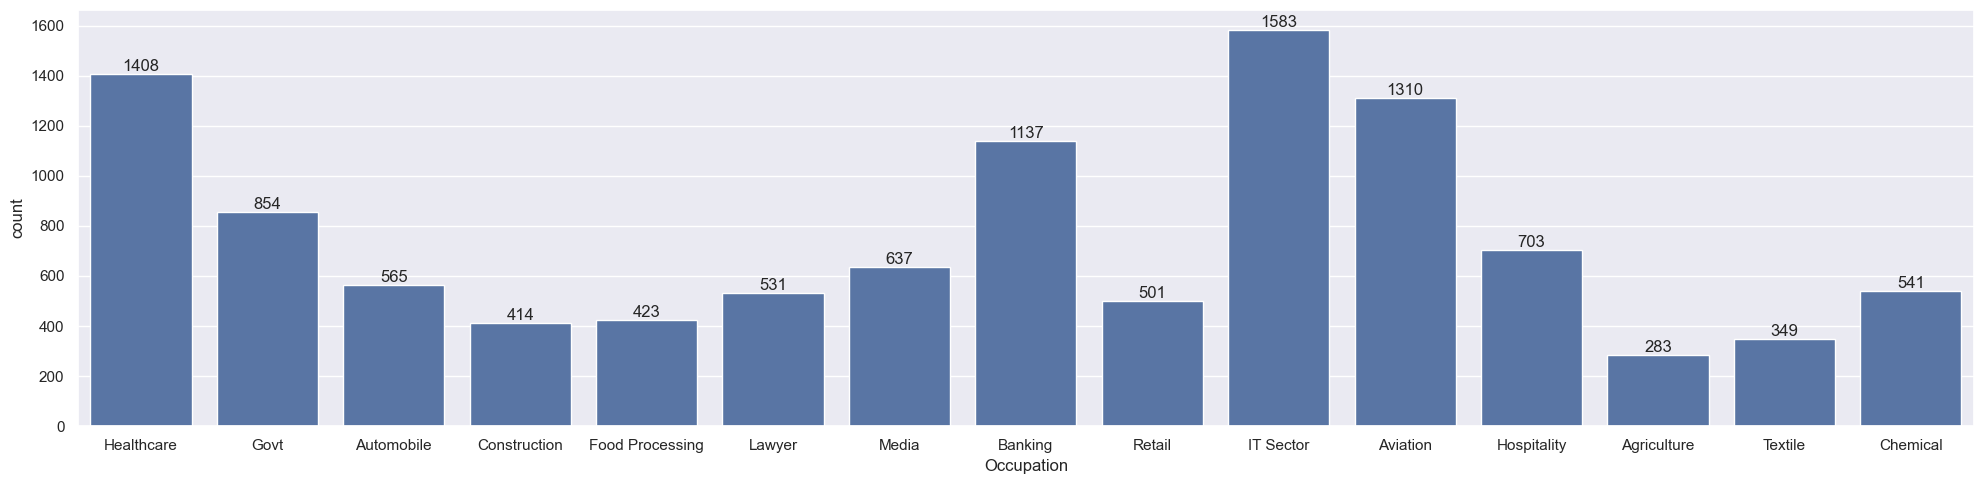

In [50]:
#occupation
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = sales_data, x = 'Occupation')
plt.tight_layout() 
for bars in ax.containers:
    ax.bar_label(bars)

#### 📈 Total Sales by Occupation
This chart displays the **total amount spent** by each occupation group.
- Again, the **IT sector** leads in sales value.
- This confirms their major role in Diwali sales, both in count and purchase power.


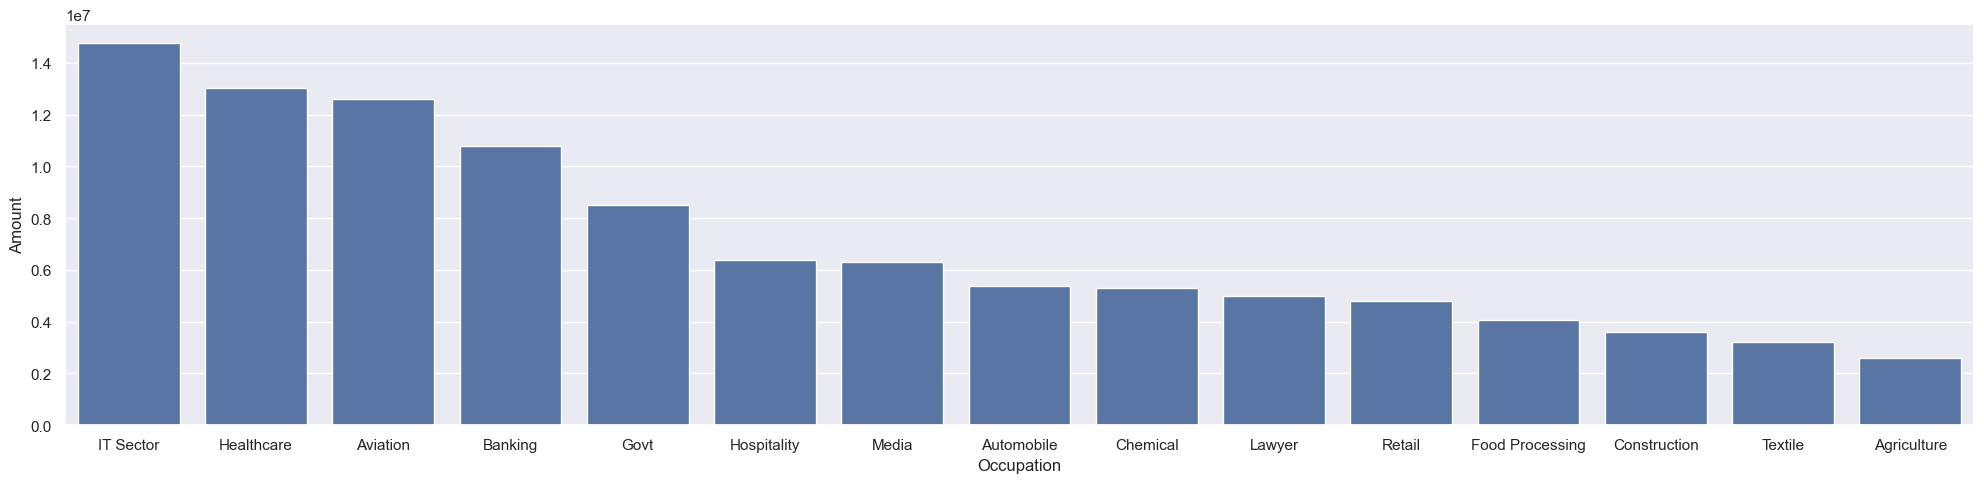

In [51]:
sales_state = sales_data.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')
plt.tight_layout() 

#### 🧺 Count of Purchases by Product Category
This chart shows how many orders were placed in each **product category**.
- Categories like **Food**, **Clothing**, and **Electronics** dominate.
- These are common Diwali purchase categories, confirming seasonal trends.


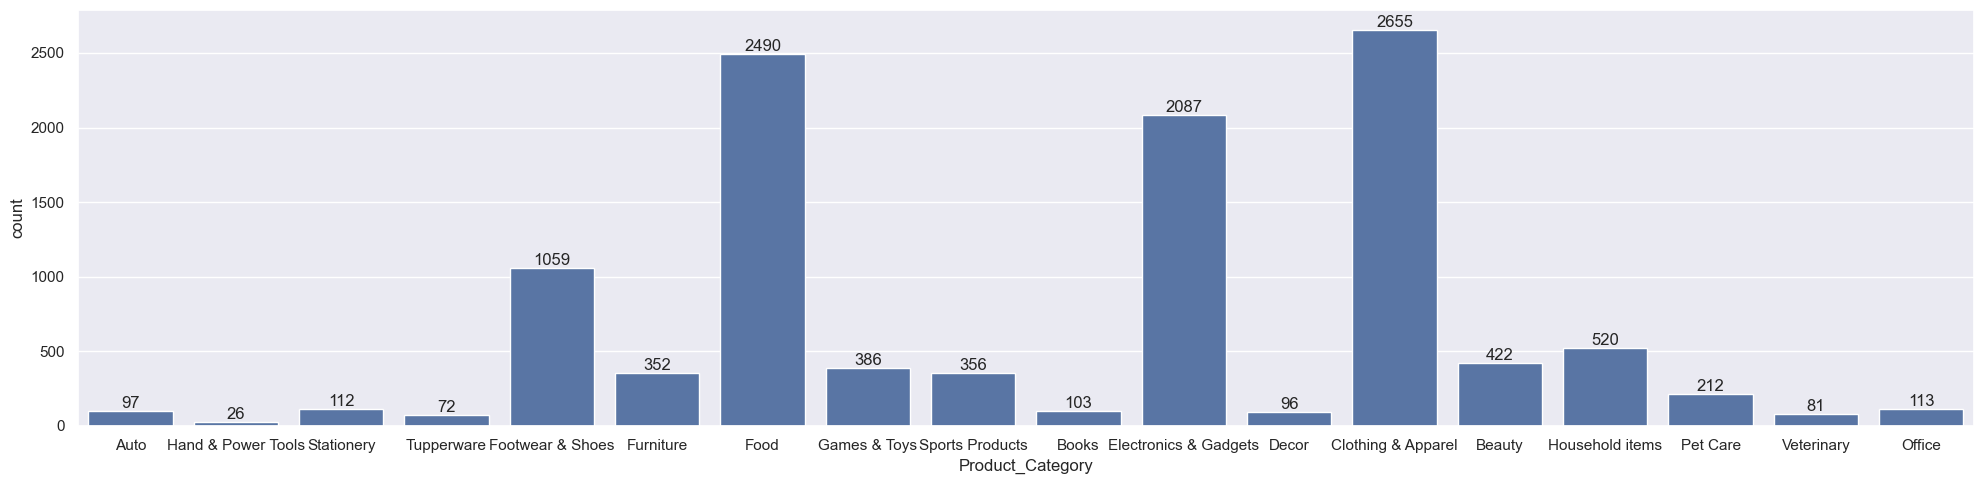

In [52]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = sales_data, x = 'Product_Category')
plt.tight_layout() 
for bars in ax.containers:
    ax.bar_label(bars)

#### 🛒 Total Sales by Product Category
This bar chart shows the **total amount spent** on each product category.
- **Electronics and Clothing** lead in total sales.
- High-value items like gadgets and apparel make up a significant chunk of Diwali shopping.


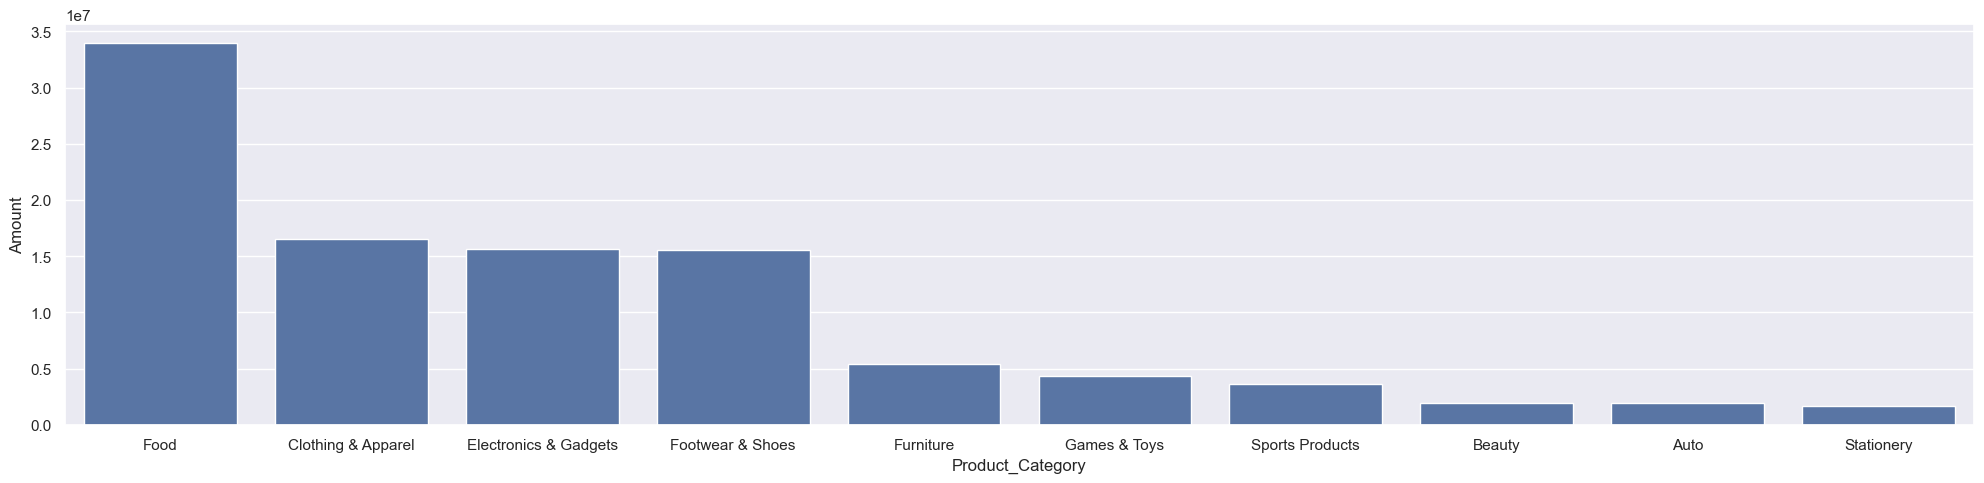

In [53]:
sales_state = sales_data.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')
plt.tight_layout() 

#### 🔝 Top 10 Best-Selling Products

This bar chart highlights the ten product IDs with the highest number of orders.  
By focusing on order counts rather than revenue, we identify which specific items were most in demand.

**Observation:**  
- Product IDs at the top of the chart were in highest demand—likely due to popular discounts or festive trends.  
- These “hot sellers” can guide inventory and promotional strategies for future Diwali campaigns.


<Axes: xlabel='Product_ID'>

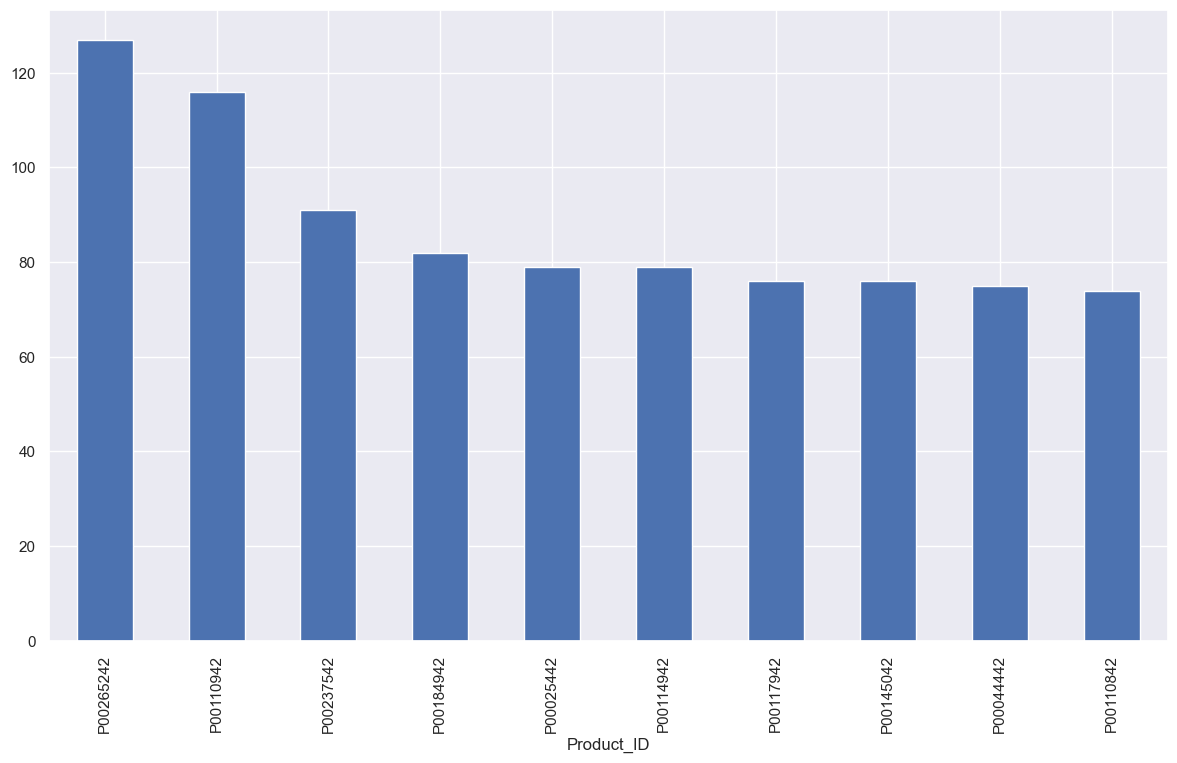

In [54]:
# TOP 10 MOST SOLD PRODUCTS

fig1, ax1 = plt.subplots(figsize=(12,7))
plt.tight_layout() 
sales_data.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## 🧾 Final Observations

- Majority of sales were made by female customers aged between 26-35.
- Most purchases were done in the Fashion and Lifestyle categories.
- The Western region contributed the highest revenue during Diwali.

This analysis can help design better discount strategies and regional targeting in upcoming festive seasons.